<a href="https://colab.research.google.com/github/jajisan/McDonalds-Case-study/blob/main/Copy_of_Case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

Step 1: Deciding (not) to segment

Step 2: Specifying the ideal target segment

In [4]:
#Step 3 : Collecting data

df = pd.read_csv("/content/mcdonalds.csv")
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male


In [5]:
#Step 4: Exploring Data

#The percentage of perception of McDonald's (x % of people find it y where x is the percentage value, and y is the property of the meal)

MD_x = df.iloc[:, 0:11]
MD_x_binary = (MD_x == "Yes").astype(int)
col_means = MD_x_binary.mean().round(2)
col_means

,0
yummy,0.55
convenient,0.91
spicy,0.09
fattening,0.87
greasy,0.53
fast,0.90
cheap,0.60
tasty,0.64
expensive,0.36
healthy,0.20


In [6]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(MD_x_binary)
std_devs = np.sqrt(pca.explained_variance_)
prop_var = pca.explained_variance_ratio_
cumulative_var = np.cumsum(prop_var)
summary_df = pd.DataFrame({
    "Std Dev": std_devs,
    "Proportion of Variance": prop_var,
    "Cumulative Variance": cumulative_var
    })
summary_df

,Std Dev,Proportion of Variance,Cumulative Variance
0,0.757050,0.299447,0.299447
1,0.607456,0.192797,0.492244
2,0.504619,0.133045,0.625290
3,0.398799,0.083096,0.708386
4,0.337405,0.059481,0.767866
5,0.310275,0.050300,0.818166
6,0.289697,0.043849,0.862015
7,0.275122,0.039548,0.901563
8,0.265251,0.036761,0.938323
9,0.248842,0.032353,0.970677


In [7]:
loadings = pca.components_.T
features = MD_x_binary.columns
loadings_df = pd.DataFrame(loadings, index=features, columns = [f'PC{i + 1}' for i in range(loadings.shape[1])])
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
yummy,0.476933,-0.363790,0.304444,0.055162,0.307535,-0.170738,-0.280519,-0.013041,-0.572403,0.110284,-0.045439
convenient,0.155332,-0.016414,0.062515,-0.142425,-0.277608,0.347830,-0.059738,0.113079,0.018465,0.665818,0.541616
spicy,0.006356,-0.018809,0.037019,0.197619,-0.070620,0.355087,0.707637,-0.375934,-0.400280,0.075634,-0.141730
fattening,-0.116232,0.034094,0.322359,-0.354139,0.073405,0.406515,-0.385943,-0.589622,0.160512,0.005338,-0.250910
greasy,-0.304443,0.063839,0.802373,0.253960,-0.361399,-0.209347,0.036170,0.138241,0.002847,-0.008707,-0.001642
fast,0.108493,0.086972,0.064642,-0.097363,-0.107930,0.594632,-0.086846,0.627799,-0.166197,-0.239532,-0.339265
cheap,0.337186,0.610633,0.149310,0.118958,0.128973,0.103241,-0.040449,-0.140060,-0.076069,-0.428087,0.489283
tasty,0.471514,-0.307318,0.287265,-0.002547,0.210899,0.076914,0.360453,0.072792,0.639086,-0.079184,-0.019552
expensive,-0.329042,-0.601286,-0.024397,0.067816,0.003125,0.261342,-0.068385,-0.029539,-0.066996,-0.454399,0.490069
healthy,0.213711,-0.076593,-0.192051,0.763488,-0.287846,0.178226,-0.349616,-0.176303,0.185572,0.038117,-0.157608


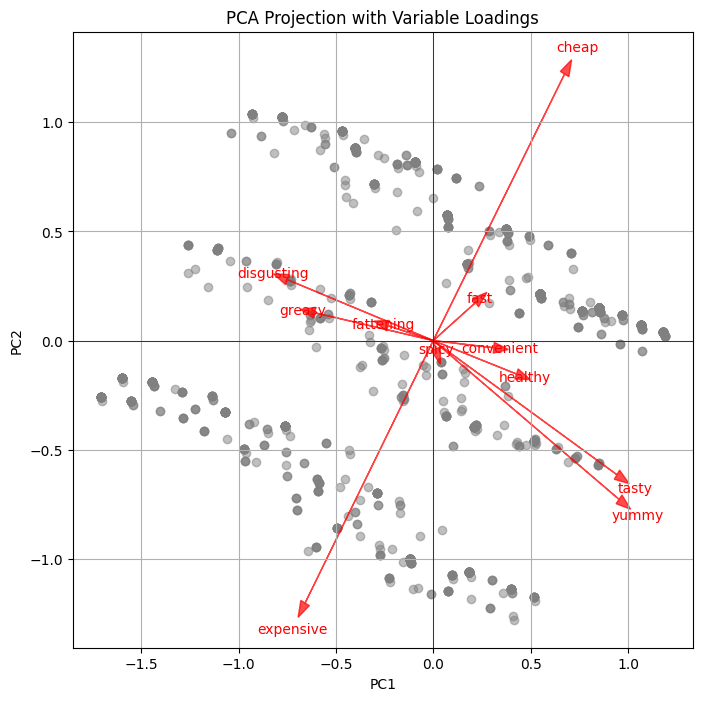

In [8]:
import matplotlib.pyplot as plt

scores = pca.transform(MD_x_binary)

plt.figure(figsize=(8, 8))
plt.scatter(scores[:, 0], scores[:, 1], color='grey', alpha=0.5)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Projection with Variable Loadings")

for i, feature in enumerate(MD_x_binary.columns):
    plt.arrow(0, 0,              # origin
              loadings[i, 0] * 2, loadings[i, 1] * 2,  # scale for visibility
              color='red', alpha=0.7, head_width=0.05)
    plt.text(loadings[i, 0]*2.2, loadings[i, 1]*2.2, feature,
             color='red', ha='center', va='center')

plt.grid()
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)
plt.show()


In [9]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

X = MD_x_binary.values

k_values = range(2, 9)
inertias = []
silhouettes = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
    kmeans.fit(X)

    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(X, kmeans.labels_))


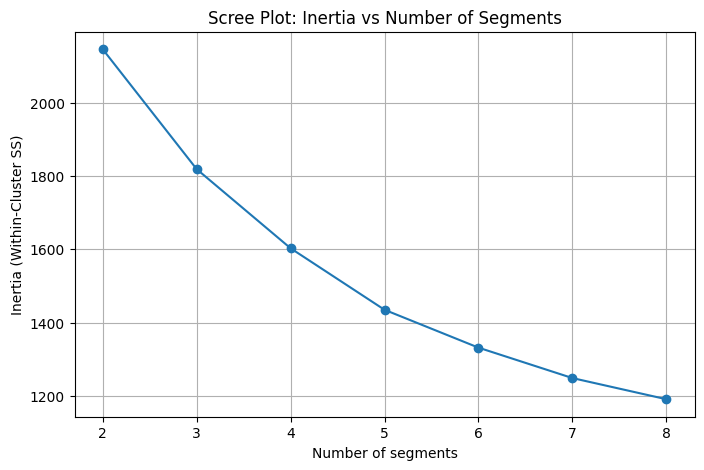

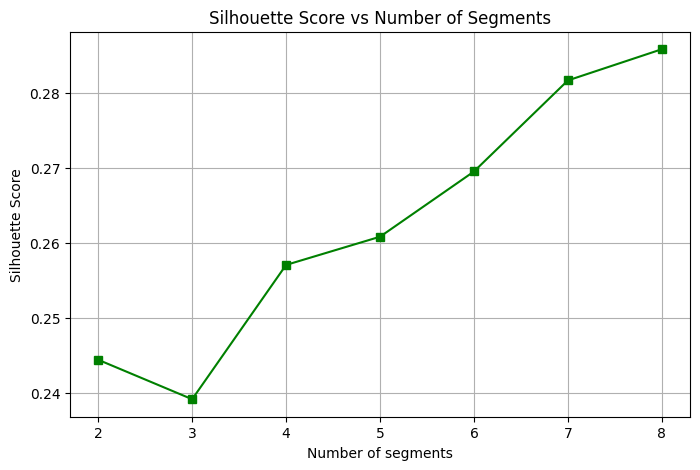

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(k_values, inertias, marker='o')
plt.title("Scree Plot: Inertia vs Number of Segments")
plt.xlabel("Number of segments")
plt.ylabel("Inertia (Within-Cluster SS)")
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouettes, marker='s', color='green')
plt.title("Silhouette Score vs Number of Segments")
plt.xlabel("Number of segments")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()


<ipython-input-11-3103031280>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="k", y="ARI", data=ari_df, palette="coolwarm")


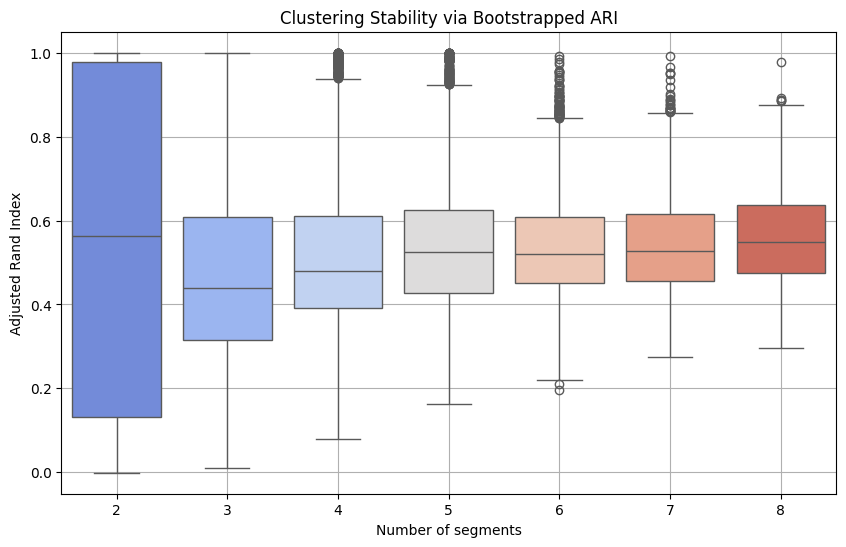

In [11]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.utils import resample
import matplotlib.pyplot as plt
import seaborn as sns

X = MD_x_binary.values
k_range = range(2, 9)
n_boot = 100
n_rep = 10
random_state = 1234

ari_results = {k: [] for k in k_range}
np.random.seed(random_state)

for k in k_range:
    for b in range(n_boot):
        X_sample, indices = resample(X, np.arange(len(X)))

        labels_list = []
        for _ in range(n_rep):
            km = KMeans(n_clusters=k, n_init=1, random_state=np.random.randint(10000))
            km.fit(X_sample)
            labels_list.append(km.labels_)

        for i in range(len(labels_list)):
            for j in range(i + 1, len(labels_list)):
                ari = adjusted_rand_score(labels_list[i], labels_list[j])
                ari_results[k].append(ari)

ari_df = pd.DataFrame([
    {"k": k, "ARI": score} for k, scores in ari_results.items() for score in scores
])

plt.figure(figsize=(10, 6))
sns.boxplot(x="k", y="ARI", data=ari_df, palette="coolwarm")
plt.xlabel("Number of segments")
plt.ylabel("Adjusted Rand Index")
plt.title("Clustering Stability via Bootstrapped ARI")
plt.grid(True)
plt.show()


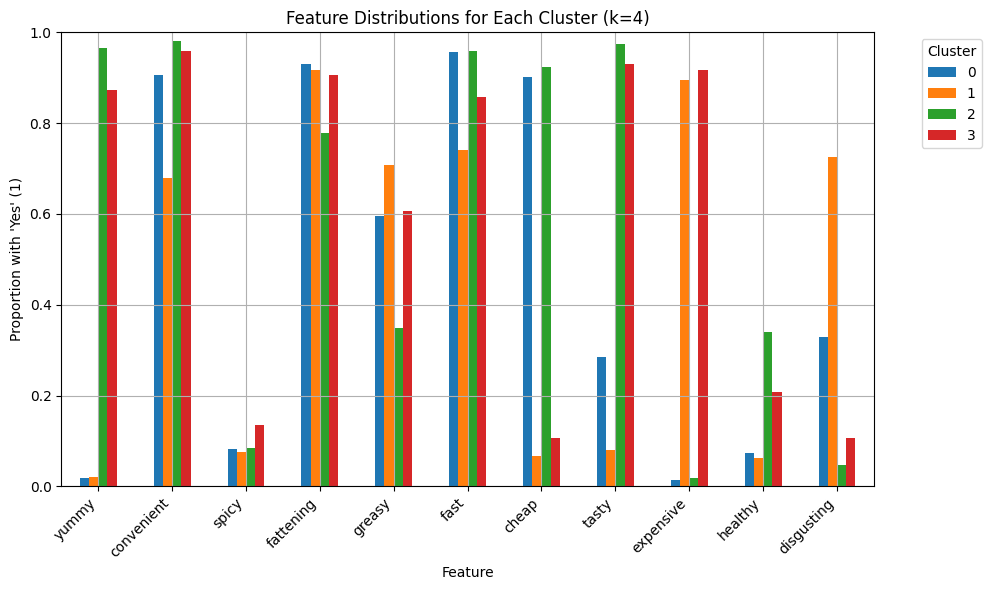

In [12]:
# Fit KMeans with k=4
k = 4
kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
labels = kmeans.fit_predict(X)

# Create a DataFrame with labels
df_clustered = pd.DataFrame(X, columns=features)
df_clustered["Cluster"] = labels

# Compute mean (i.e., % of "Yes") for each feature in each cluster
cluster_means = df_clustered.groupby("Cluster").mean()

# Plot: Cluster-wise histogram (stacked bar chart)
cluster_means.T.plot(kind="bar", figsize=(10, 6), ylim=(0, 1))
plt.title("Feature Distributions for Each Cluster (k=4)")
plt.ylabel("Proportion with 'Yes' (1)")
plt.xlabel("Feature")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()

Step 6: Profiling Segments

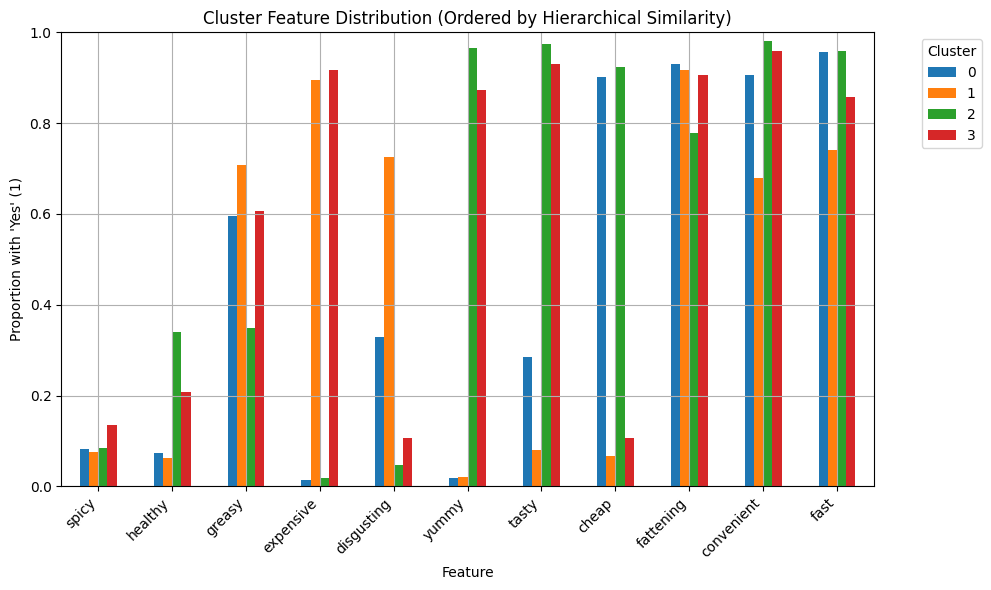

In [13]:
from scipy.cluster.hierarchy import linkage, dendrogram

# Step: Hierarchical clustering on variables
X_transposed = MD_x_binary.T
linked = linkage(X_transposed, method='ward')
dendro = dendrogram(linked, labels=X_transposed.index, no_plot=True)
ordered_features = dendro['ivl']

# Reorder cluster means by hierarchical similarity
cluster_means_ordered = cluster_means[ordered_features]

# Plot: Cluster-wise bar chart with hierarchically ordered features
cluster_means_ordered.T.plot(kind="bar", figsize=(10, 6), ylim=(0, 1))
plt.title("Cluster Feature Distribution (Ordered by Hierarchical Similarity)")
plt.ylabel("Proportion with 'Yes' (1)")
plt.xlabel("Feature")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()

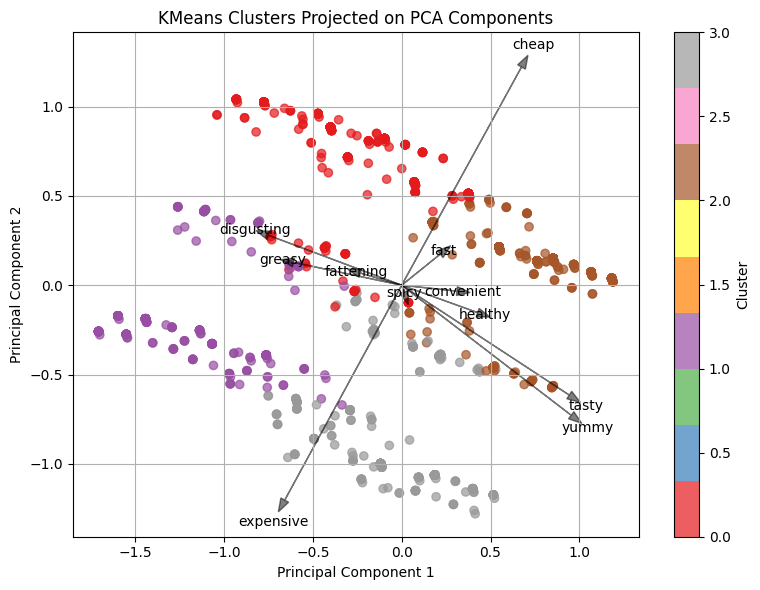

In [14]:
# PCA and KMeans clustering
pca = PCA(n_components=2)
pca_scores = pca.fit_transform(MD_x_binary)
kmeans = KMeans(n_clusters=4, n_init=10, random_state=1234)
labels = kmeans.fit_predict(MD_x_binary)

# PCA projection plot with clusters
plt.figure(figsize=(8, 6))
scatter = plt.scatter(pca_scores[:, 0], pca_scores[:, 1], c=labels, cmap='Set1', alpha=0.7)

# Add variable loadings as arrows
loadings = pca.components_.T
for i, feature in enumerate(MD_x_binary.columns):
    plt.arrow(0, 0, loadings[i, 0]*2, loadings[i, 1]*2,
              color='black', alpha=0.5, head_width=0.05)
    plt.text(loadings[i, 0]*2.2, loadings[i, 1]*2.2, feature,
             color='black', ha='center', va='center')

plt.title("KMeans Clusters Projected on PCA Components")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.colorbar(scatter, label="Cluster")
plt.tight_layout()
plt.show()

Step 7: Describing Segments

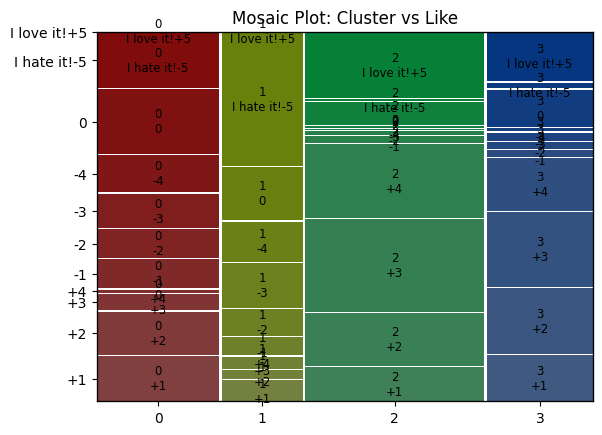

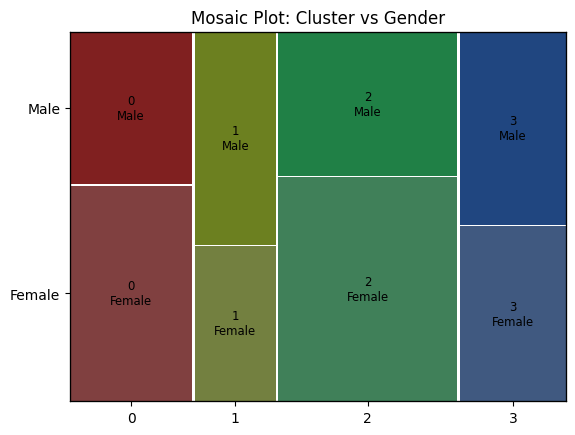

In [15]:
from statsmodels.graphics.mosaicplot import mosaic

# Add cluster labels to original DataFrame
df["Cluster"] = KMeans(n_clusters=4, n_init=10, random_state=1234).fit_predict(MD_x_binary)

# Mosaic Plot: Cluster vs Like
mosaic(pd.crosstab(df["Cluster"], df["Like"]).stack())
plt.title("Mosaic Plot: Cluster vs Like")
plt.show()

# Mosaic Plot: Cluster vs Gender
mosaic(pd.crosstab(df["Cluster"], df["Gender"]).stack())
plt.title("Mosaic Plot: Cluster vs Gender")
plt.show()

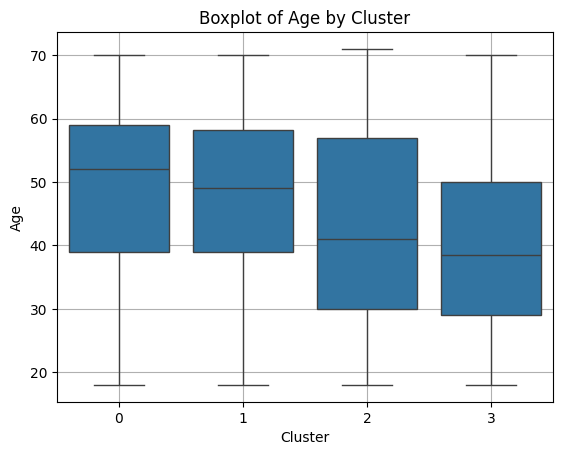

In [16]:
sns.boxplot(x="Cluster", y="Age", data=df)
plt.title("Boxplot of Age by Cluster")
plt.grid(True)
plt.show()

Cluster Labels: [2 1 3 4]
Visit: cluster
1   NaN
2   NaN
3   NaN
4   NaN
Name: VisitFrequency, dtype: float64
Like: cluster
1    1.596721
2   -3.059113
3    3.411311
4   -0.072797
Name: Like, dtype: float64
Female Proportion: cluster
1    0.563877
2    0.541872
3    0.560411
4    0.501229
Name: Gender, dtype: float64


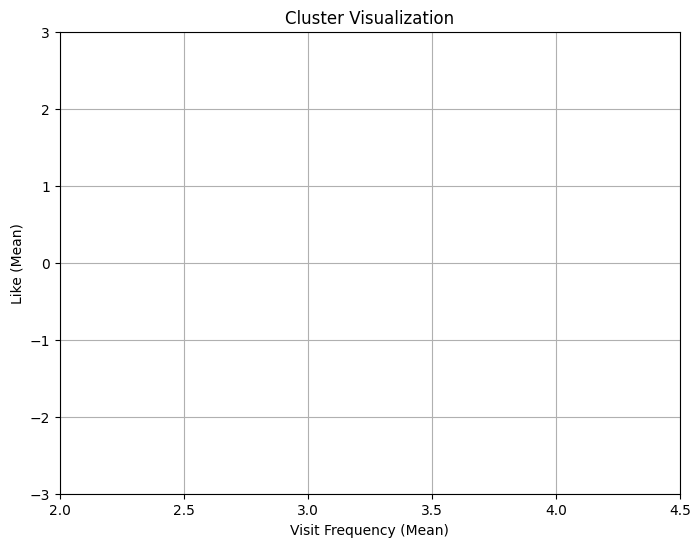

In [44]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# Extract only numerical or binary-encoded columns
features = mcdonalds[["yummy", "convenient", "spicy", "fattening", "greasy",
                      "fast", "cheap", "tasty", "expensive", "healthy",
                      "disgusting", "Like"]]

# Handle any NaN values
features = features.fillna(features.mean(numeric_only=True))

# Run KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
k4 = kmeans.fit_predict(features)

# Add cluster labels to the DataFrame
mcdonalds['cluster'] = k4 + 1  # R-style cluster indexing (1–4)

# Compute cluster-wise statistics
visit = mcdonalds.groupby('cluster')['VisitFrequency'].mean()
like = mcdonalds.groupby('cluster')['Like'].mean()
female = mcdonalds.groupby('cluster')['Gender'].apply(lambda x: np.mean(x == 'Female'))

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(visit, like, s=1000 * female, alpha=0.6)
for i, (x, y) in enumerate(zip(visit, like), 1):
    plt.text(x, y, str(i), fontsize=12, ha='center', va='center')

print("Cluster Labels:", mcdonalds['cluster'].unique())
print("Visit:", visit)
print("Like:", like)
print("Female Proportion:", female)

plt.xlim(2, 4.5)
plt.ylim(-3, 3)
plt.xlabel('Visit Frequency (Mean)')
plt.ylabel('Like (Mean)')
plt.title('Cluster Visualization')
plt.grid(True)
plt.show()